In [3]:
# Imports
import pandas as pd
import re
from tqdm import tqdm
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

import spacy
from spacy.lang.en import English
nlp = English()
stopwords = English.Defaults.stop_words
from spacy.tokenizer import Tokenizer
spacy_tokenizer = Tokenizer(nlp.vocab)

from nltk.tokenize import word_tokenize as nltk_tokenizer

In [4]:
# Reading CSV File into Pandas DataFrame
df = pd.read_csv('Data/ISEAR.csv', 
                 header = None)
print(df.shape)
df.drop(df.columns[2], 
        axis = 1, 
        inplace = True)

df.columns = ['emotions', 'texts']
print('Data Set Shape:', df.shape)
print(df.head())

(7516, 3)
Data Set Shape: (7516, 2)
  emotions                                              texts
0      joy  On days when I feel close to my partner and ot...
1     fear  Every time I imagine that someone I love or I ...
2    anger  When I had been obviously unjustly treated and...
3  sadness  When I think about the short time that we live...
4  disgust  At a gathering I found myself involuntarily si...


In [5]:
def tokenize(text):
    return [i.text for i in tokenizer(text)]

def plot_dist(token_list, count_list, xlabel, ylabel, title, filepath):
    dist_df = pd.DataFrame({'count_list': count_list, 'token_list': token_list})
    plt.style.use('ggplot')
    plt.figure(figsize = (7, 7))
    sns.barplot(x = 'count_list', y = 'token_list' , data = dist_df, orient = 'h')
    plt.xlabel(xlabel, size = 8)
    plt.ylabel(ylabel, size = 8)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
    plt.title(title, size = 10)
    plt.savefig(filepath)

100%|████████████████████████████████████| 1092/1092 [00:00<00:00, 44496.71it/s]


Spacy Tokenizer --> Vocab Size ( joy ): 2044
Spacy Tokenizer --> Vocab ( joy ): 
 {'I': 0, 'When': 1, 'got': 2, 'felt': 3, 'friend': 4, 'passed': 5, 'happy': 6, 'The': 7, 'good': 8, 'time': 9, 'joy': 10, 'My': 11, 'came': 12, 'long': 13, 'told': 14, 'year': 15, 'received': 16, 'met': 17, 'A': 18, 'heard': 19, 'accepted': 20, 'day': 21, 'After': 22, 'went': 23, 'It': 24, 'We': 25, 'selected': 26, 'saw': 27, 'school': 28, 'close': 29, 'gave': 30, 'letter': 31, 'friends': 32, 'love': 33, 'results': 34, 'seen': 35, 'having': 36, 'home': 37, 'boyfriend': 38, 'examination': 39, 'won': 40, 'girl': 41, 'admitted': 42, 'found': 43, 'This': 44, 'university': 45, 'feeling': 46, 'old': 47, 'exam': 48, 'wanted': 49}


100%|████████████████████████████████████| 1092/1092 [00:00<00:00, 13987.97it/s]


NLTK Tokenizer --> Vocab Size ( joy ): 2436
NLTK Tokenizer --> Vocab ( joy ): 
 {'I': 0, 'When': 1, 'friend': 2, 'got': 3, 'time': 4, 'passed': 5, 'felt': 6, 'happy': 7, 'joy': 8, 'good': 9, 'The': 10, 'year': 11, 'school': 12, 'friends': 13, 'My': 14, 'came': 15, 'long': 16, 'exam': 17, 'told': 18, 'received': 19, 'met': 20, 'love': 21, 'university': 22, 'accepted': 23, 'day': 24, 'A': 25, 'heard': 26, 'home': 27, 'After': 28, 'went': 29, 'It': 30, 'examination': 31, 'boyfriend': 32, 'selected': 33, 'We': 34, 'results': 35, 'close': 36, 'saw': 37, 'girl': 38, 'letter': 39, 'exams': 40, 'gave': 41, 'seen': 42, 'having': 43, 'years': 44, 'won': 45, 'girlfriend': 46, 'months': 47, 'birthday': 48, 'sister': 49}


100%|████████████████████████████████████| 1076/1076 [00:00<00:00, 41158.13it/s]


Spacy Tokenizer --> Vocab Size ( fear ): 2571
Spacy Tokenizer --> Vocab ( fear ): 
 {'I': 0, 'When': 1, 'afraid': 2, 'night': 3, 'felt': 4, 'fear': 5, 'home': 6, 'car': 7, 'The': 8, 'went': 9, 'going': 10, 'time': 11, 'My': 12, 'friend': 13, 'came': 14, 'One': 15, 'It': 16, 'A': 17, 'dark': 18, 'got': 19, 'saw': 20, 'know': 21, 'thought': 22, 'day': 23, 'walking': 24, 'house': 25, 'father': 26, 'school': 27, 'scared': 28, 'man': 29, 'suddenly': 30, 'feared': 31, 'started': 32, 'heard': 33, 'We': 34, 'mother': 35, 'told': 36, 'way': 37, 'people': 38, 'Before': 39, 'late': 40, 'road': 41, 'found': 42, 'friends': 43, 'left': 44, 'having': 45, 'He': 46, 'lost': 47, 'driving': 48, 'ran': 49}


100%|████████████████████████████████████| 1076/1076 [00:00<00:00, 12061.17it/s]


NLTK Tokenizer --> Vocab Size ( fear ): 3019
NLTK Tokenizer --> Vocab ( fear ): 
 {'I': 0, 'When': 1, 'night': 2, 'afraid': 3, 'home': 4, 'car': 5, 'fear': 6, 'felt': 7, 'time': 8, 'The': 9, 'friend': 10, 'house': 11, 'went': 12, 'dark': 13, 'going': 14, 'day': 15, 'came': 16, 'My': 17, 'school': 18, 'One': 19, 'It': 20, 'A': 21, 'scared': 22, 'father': 23, 'got': 24, 'saw': 25, 'road': 26, 'know': 27, 'thought': 28, 'man': 29, 'walking': 30, 'accident': 31, 'people': 32, 'suddenly': 33, 'mother': 34, 'way': 35, 'friends': 36, 'late': 37, 'frightened': 38, 'started': 39, 'heard': 40, 'feared': 41, 'We': 42, 'exam': 43, 'told': 44, 'away': 45, 'room': 46, 'dog': 47, 'Before': 48, 'door': 49}


100%|████████████████████████████████████| 1079/1079 [00:00<00:00, 32378.14it/s]


Spacy Tokenizer --> Vocab Size ( anger ): 2775
Spacy Tokenizer --> Vocab ( anger ): 
 {'I': 0, 'When': 1, 'friend': 2, 'angry': 3, 'My': 4, 'A': 5, 'told': 6, 'got': 7, 'felt': 8, 'time': 9, 'The': 10, 'mother': 11, 'person': 12, 'friends': 13, 'He': 14, 'went': 15, 'day': 16, 'people': 17, 'wanted': 18, 'came': 19, 'home': 20, 'brother': 21, 'asked': 22, 'anger': 23, 'father': 24, 'having': 25, 'said': 26, 'things': 27, 'It': 28, 'In': 29, 'We': 30, 'One': 31, 'sister': 32, 'car': 33, 'tried': 34, 'This': 35, 'found': 36, 'school': 37, 'At': 38, 'boyfriend': 39, 'work': 40, 'called': 41, 'money': 42, 'certain': 43, 'thought': 44, 'accused': 45, 'way': 46, 'left': 47, 'She': 48, 'promised': 49}


100%|████████████████████████████████████| 1079/1079 [00:00<00:00, 11829.49it/s]


NLTK Tokenizer --> Vocab Size ( anger ): 3191
NLTK Tokenizer --> Vocab ( anger ): 
 {'I': 0, 'When': 1, 'angry': 2, 'friend': 3, 'My': 4, 'A': 5, 'time': 6, 'told': 7, 'got': 8, 'felt': 9, 'mother': 10, 'person': 11, 'friends': 12, 'day': 13, 'people': 14, 'father': 15, 'brother': 16, 'The': 17, 'anger': 18, 'school': 19, 'home': 20, 'work': 21, 'went': 22, 'He': 23, 'wanted': 24, 'boyfriend': 25, 'came': 26, 'things': 27, 'asked': 28, 'said': 29, 'car': 30, 'sister': 31, 'having': 32, 'money': 33, 'It': 34, 'girlfriend': 35, 'In': 36, 'We': 37, 'One': 38, 'way': 39, 'away': 40, 'tried': 41, 'This': 42, 'found': 43, 'parents': 44, 'thought': 45, 'left': 46, 'teacher': 47, 'room': 48, 'girl': 49}


100%|████████████████████████████████████| 1082/1082 [00:00<00:00, 45104.08it/s]


Spacy Tokenizer --> Vocab Size ( sadness ): 2009
Spacy Tokenizer --> Vocab ( sadness ): 
 {'I': 0, 'When': 1, 'My': 2, 'friend': 3, 'felt': 4, 'sad': 5, 'The': 6, 'died': 7, 'close': 8, 'father': 9, 'A': 10, 'mother': 11, 'time': 12, 'passed': 13, 'left': 14, 'death': 15, 'heard': 16, 'grandmother': 17, 'It': 18, 'home': 19, 'away': 20, 'boyfriend': 21, 'friends': 22, 'years': 23, 'told': 24, 'got': 25, 'went': 26, 'He': 27, 'thought': 28, 'She': 29, 'girl': 30, 'day': 31, 'having': 32, 'relationship': 33, 'grandfather': 34, 'failed': 35, 'sister': 36, 'We': 37, 'saw': 38, 'long': 39, 'brother': 40, 'feel': 41, 'good': 42, 'girlfriend': 43, 'family': 44, 'After': 45, 'know': 46, 'found': 47, 'wanted': 48, 'parents': 49}


100%|████████████████████████████████████| 1082/1082 [00:00<00:00, 13808.60it/s]


NLTK Tokenizer --> Vocab Size ( sadness ): 2379
NLTK Tokenizer --> Vocab ( sadness ): 
 {'I': 0, 'When': 1, 'died': 2, 'friend': 3, 'sad': 4, 'My': 5, 'felt': 6, 'time': 7, 'The': 8, 'father': 9, 'away': 10, 'mother': 11, 'close': 12, 'years': 13, 'home': 14, 'A': 15, 'death': 16, 'friends': 17, 'left': 18, 'boyfriend': 19, 'grandmother': 20, 'passed': 21, 'heard': 22, 'relationship': 23, 'It': 24, 'grandfather': 25, 'told': 26, 'got': 27, 'family': 28, 'girl': 29, 'girlfriend': 30, 'brother': 31, 'day': 32, 'sister': 33, 'thought': 34, 'went': 35, 'parents': 36, 'He': 37, 'school': 38, 'accident': 39, 'year': 40, 'She': 41, 'person': 42, 'sadness': 43, 'failed': 44, 'having': 45, 'wanted': 46, 'old': 47, 'long': 48, 'good': 49}


100%|████████████████████████████████████| 1066/1066 [00:00<00:00, 45255.25it/s]


Spacy Tokenizer --> Vocab Size ( disgust ): 2730
Spacy Tokenizer --> Vocab ( disgust ): 
 {'I': 0, 'When': 1, 'disgusted': 2, 'saw': 3, 'felt': 4, 'A': 5, 'people': 6, 'friend': 7, 'man': 8, 'The': 9, 'disgust': 10, 'person': 11, 'got': 12, 'My': 13, 'drunk': 14, 'found': 15, 'like': 16, 'came': 17, 'He': 18, 'went': 19, 'It': 20, 'feel': 21, 'having': 22, 'friends': 23, 'girl': 24, 'One': 25, 'day': 26, 'In': 27, 'told': 28, 'started': 29, 'At': 30, 'way': 31, 'tried': 32, 'bus': 33, 'home': 34, 'school': 35, 'Saw': 36, 'woman': 37, 'time': 38, 'film': 39, 'wanted': 40, 'things': 41, 'bad': 42, 'work': 43, 'heard': 44, 'thought': 45, 'close': 46, 'asked': 47, 'certain': 48, 'This': 49}


100%|████████████████████████████████████| 1066/1066 [00:00<00:00, 13284.83it/s]


NLTK Tokenizer --> Vocab Size ( disgust ): 3241
NLTK Tokenizer --> Vocab ( disgust ): 
 {'I': 0, 'When': 1, 'disgusted': 2, 'saw': 3, 'felt': 4, 'people': 5, 'A': 6, 'friend': 7, 'man': 8, 'The': 9, 'disgust': 10, 'person': 11, 'drunk': 12, 'friends': 13, 'like': 14, 'girl': 15, 'got': 16, 'time': 17, 'My': 18, 'found': 19, 'bus': 20, 'He': 21, 'came': 22, 'day': 23, 'went': 24, 'way': 25, 'It': 26, 'school': 27, 'home': 28, 'feel': 29, 'woman': 30, 'having': 31, 'One': 32, 'In': 33, 'told': 34, 'started': 35, 'At': 36, 'tried': 37, 'film': 38, 'boyfriend': 39, 'wanted': 40, 'house': 41, 'sister': 42, 'work': 43, 'Saw': 44, 'bad': 45, 'father': 46, 'place': 47, 'things': 48, 'mother': 49}


100%|████████████████████████████████████| 1071/1071 [00:00<00:00, 42602.97it/s]


Spacy Tokenizer --> Vocab Size ( shame ): 2350
Spacy Tokenizer --> Vocab ( shame ): 
 {'I': 0, 'When': 1, 'felt': 2, 'ashamed': 3, 'friend': 4, 'told': 5, 'My': 6, 'time': 7, 'found': 8, 'mother': 9, 'asked': 10, 'person': 11, 'day': 12, 'came': 13, 'got': 14, 'friends': 15, 'The': 16, 'people': 17, 'A': 18, 'teacher': 19, 'said': 20, 'having': 21, 'shame': 22, 'feel': 23, 'class': 24, 'went': 25, 'thought': 26, 'caught': 27, 'girl': 28, 'parents': 29, 'know': 30, 'good': 31, 'failed': 32, 'In': 33, 'Not': 34, 'saw': 35, 'One': 36, 'father': 37, 'boyfriend': 38, 'going': 39, 'wanted': 40, 'later': 41, 'At': 42, 'It': 43, 'school': 44, 'wrong': 45, 'realized': 46, 'started': 47, 'discovered': 48, 'night': 49}


100%|████████████████████████████████████| 1071/1071 [00:00<00:00, 13037.43it/s]


NLTK Tokenizer --> Vocab Size ( shame ): 2737
NLTK Tokenizer --> Vocab ( shame ): 
 {'I': 0, 'When': 1, 'ashamed': 2, 'felt': 3, 'friend': 4, 'time': 5, 'told': 6, 'My': 7, 'mother': 8, 'people': 9, 'class': 10, 'friends': 11, 'day': 12, 'found': 13, 'person': 14, 'shame': 15, 'girl': 16, 'asked': 17, 'came': 18, 'teacher': 19, 'got': 20, 'said': 21, 'parents': 22, 'The': 23, 'A': 24, 'having': 25, 'school': 26, 'went': 27, 'feel': 28, 'know': 29, 'caught': 30, 'thought': 31, 'girlfriend': 32, 'boyfriend': 33, 'good': 34, 'wrong': 35, 'failed': 36, 'later': 37, 'father': 38, 'place': 39, 'In': 40, 'home': 41, 'drunk': 42, 'answer': 43, 'party': 44, 'Not': 45, 'night': 46, 'man': 47, 'boy': 48, 'saw': 49}


100%|████████████████████████████████████| 1049/1049 [00:00<00:00, 39914.95it/s]


Spacy Tokenizer --> Vocab Size ( guilt ): 2396
Spacy Tokenizer --> Vocab ( guilt ): 
 {'I': 0, 'When': 1, 'felt': 2, 'guilty': 3, 'friend': 4, 'mother': 5, 'told': 6, 'My': 7, 'went': 8, 'time': 9, 'got': 10, 'asked': 11, 'home': 12, 'A': 13, 'The': 14, 'feel': 15, 'having': 16, 'person': 17, 'parents': 18, 'wanted': 19, 'day': 20, 'friends': 21, 'found': 22, 'brother': 23, 'said': 24, 'thought': 25, 'father': 26, 'sister': 27, 'came': 28, 'took': 29, 'girl': 30, 'close': 31, 'One': 32, 'guilt': 33, 'little': 34, 'After': 35, 'help': 36, 'It': 37, 'going': 38, 'work': 39, 'later': 40, 'know': 41, 'boyfriend': 42, 'money': 43, 'He': 44, 'bad': 45, 'school': 46, 'people': 47, 'She': 48, 'hurt': 49}


100%|████████████████████████████████████| 1049/1049 [00:00<00:00, 12030.62it/s]


NLTK Tokenizer --> Vocab Size ( guilt ): 2741
NLTK Tokenizer --> Vocab ( guilt ): 
 {'I': 0, 'When': 1, 'felt': 2, 'guilty': 3, 'friend': 4, 'mother': 5, 'time': 6, 'told': 7, 'My': 8, 'went': 9, 'home': 10, 'parents': 11, 'day': 12, 'got': 13, 'person': 14, 'sister': 15, 'asked': 16, 'A': 17, 'friends': 18, 'The': 19, 'father': 20, 'feel': 21, 'having': 22, 'brother': 23, 'guilt': 24, 'work': 25, 'wanted': 26, 'school': 27, 'boyfriend': 28, 'money': 29, 'girl': 30, 'later': 31, 'found': 32, 'thought': 33, 'car': 34, 'said': 35, 'came': 36, 'help': 37, 'close': 38, 'people': 39, 'took': 40, 'late': 41, 'going': 42, 'little': 43, 'One': 44, 'bad': 45, 'After': 46, 'know': 47, 'It': 48, 'girlfriend': 49}


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 4519.72it/s]


Spacy Tokenizer --> Vocab Size ( guit ): 34
Spacy Tokenizer --> Vocab ( guit ): 
 {'I': 0, 'avoid': 1, 'tried': 2, 'want': 3, 'At': 4, 'roommate': 5, 'selfish': 6, 'person': 7, 'anyhting': 8, 'concern': 9, 'A': 10, 'prepared': 11, 'lunch': 12, 'decided': 13, 'share': 14, 'My': 15, 'roomate': 16, 'promised': 17, 'wash': 18, 'bowls': 19, 'everytime': 20, 'wait': 21, 'thought': 22, 'realize': 23, 'tell': 24, 'work': 25, 'university': 26, 'student': 27, 'ought': 28, 'He': 29, 'disappointed': 30, 'time': 31, 'saw': 32, 'contact': 33}


100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 2261.08it/s]


NLTK Tokenizer --> Vocab Size ( guit ): 37
NLTK Tokenizer --> Vocab ( guit ): 
 {'I': 0, 'avoid': 1, 'work': 2, 'tried': 3, 'want': 4, 'At': 5, 'hostel': 6, 'roommate': 7, 'selfish': 8, 'person': 9, 'anyhting': 10, 'concern': 11, 'A': 12, 'prepared': 13, 'lunch': 14, 'decided': 15, 'share': 16, 'My': 17, 'roomate': 18, 'promised': 19, 'wash': 20, 'bowls': 21, 'everytime': 22, 'dinner': 23, 'wait': 24, 'thought': 25, 'realize': 26, 'fault': 27, 'tell': 28, 'university': 29, 'student': 30, 'ought': 31, 'He': 32, 'disappointed': 33, 'time': 34, 'saw': 35, 'contact': 36}


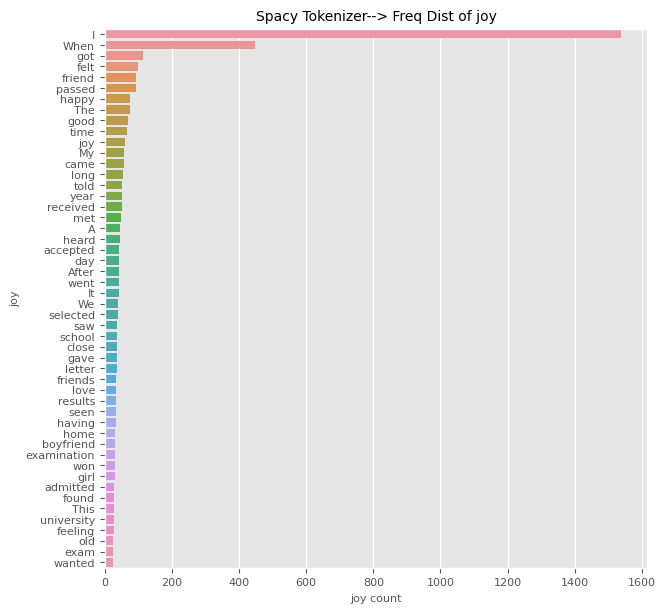

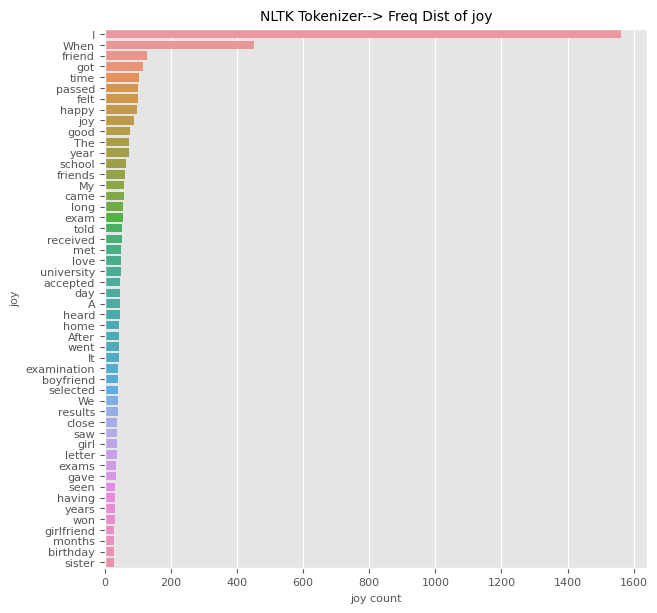

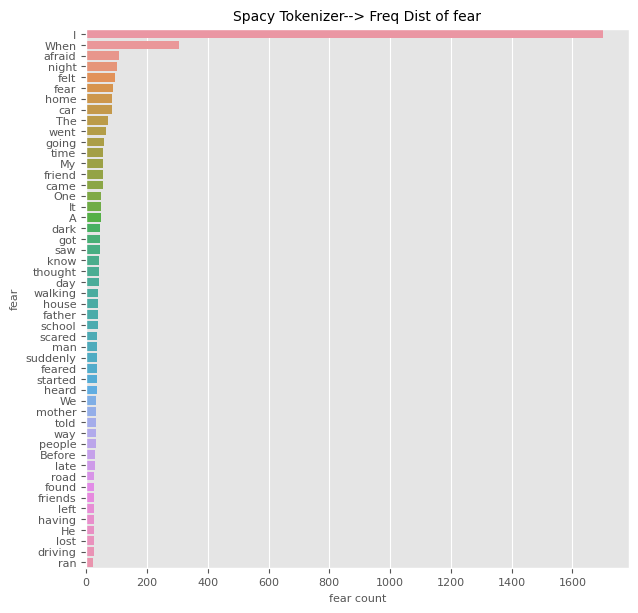

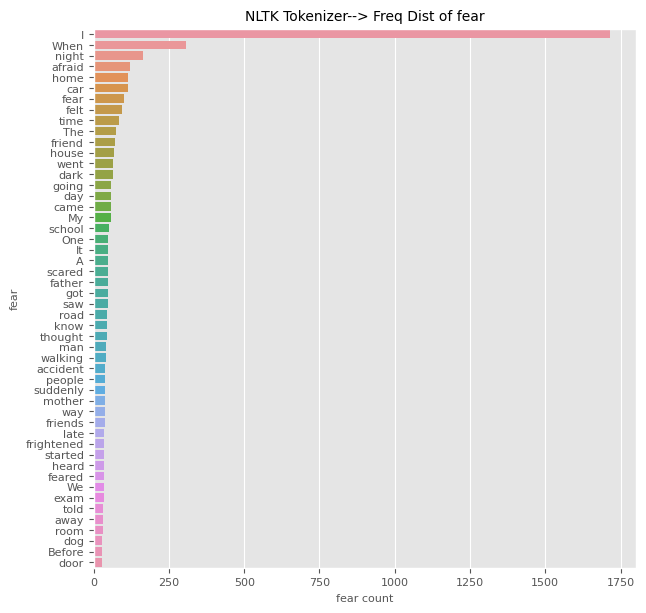

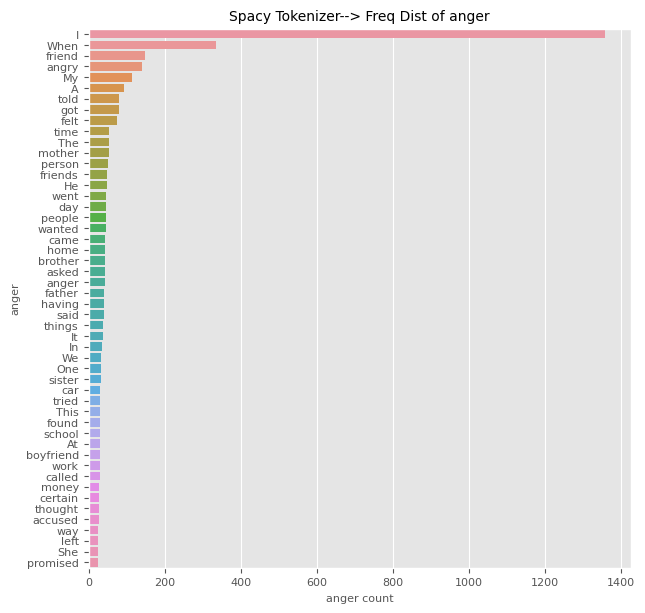

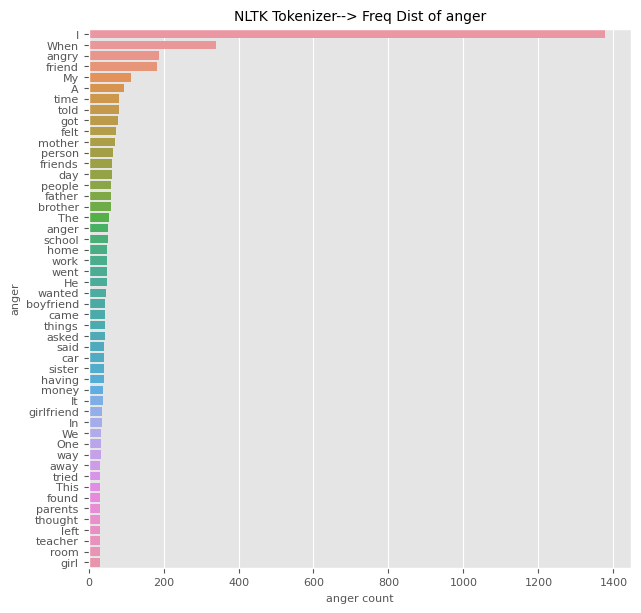

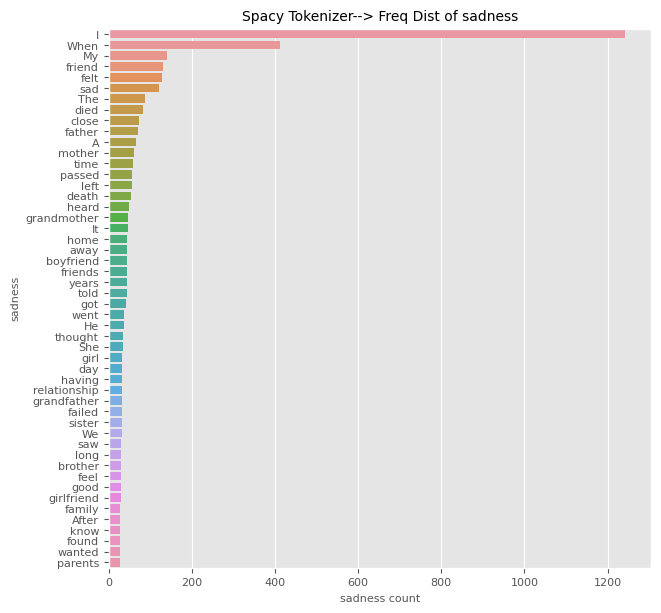

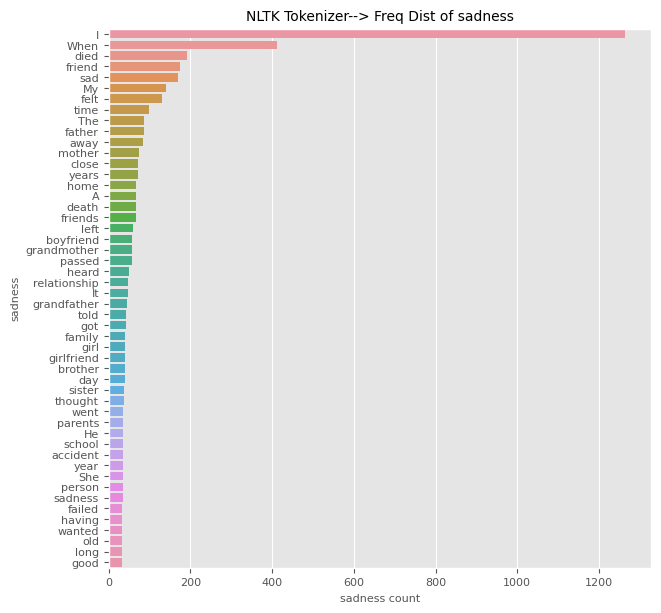

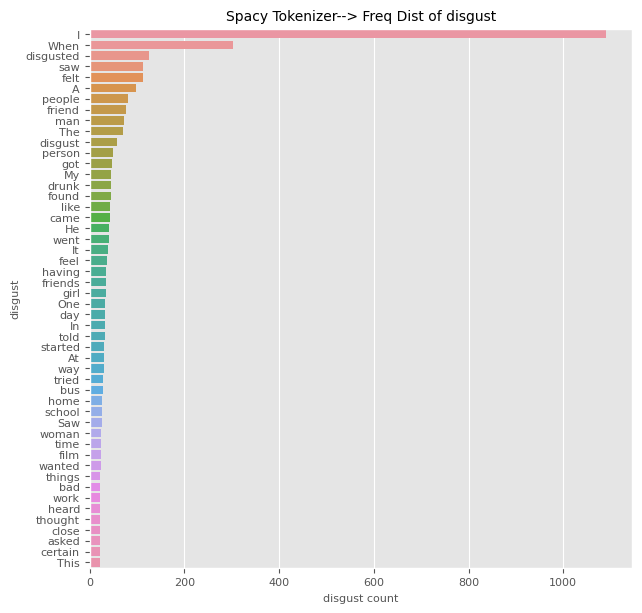

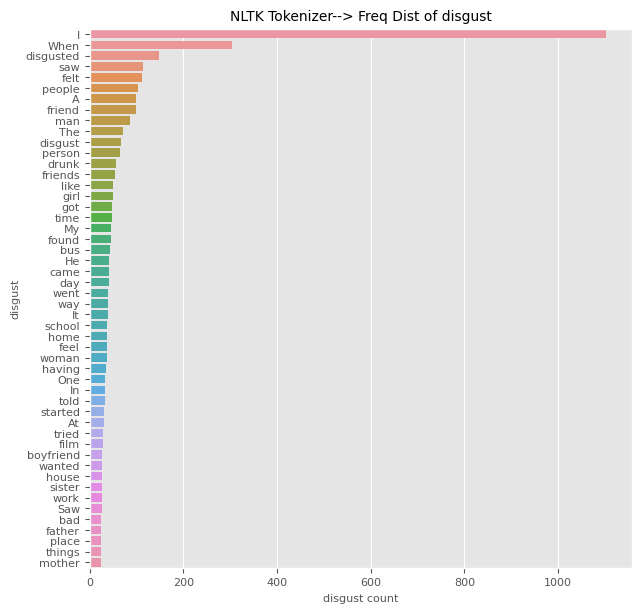

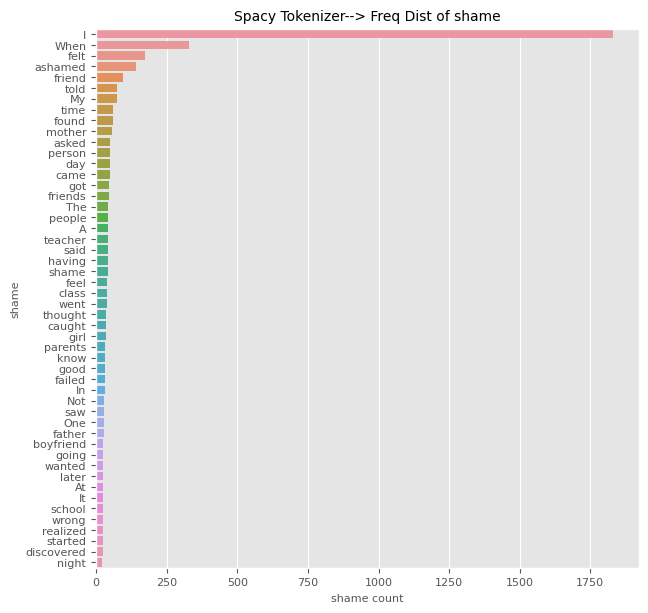

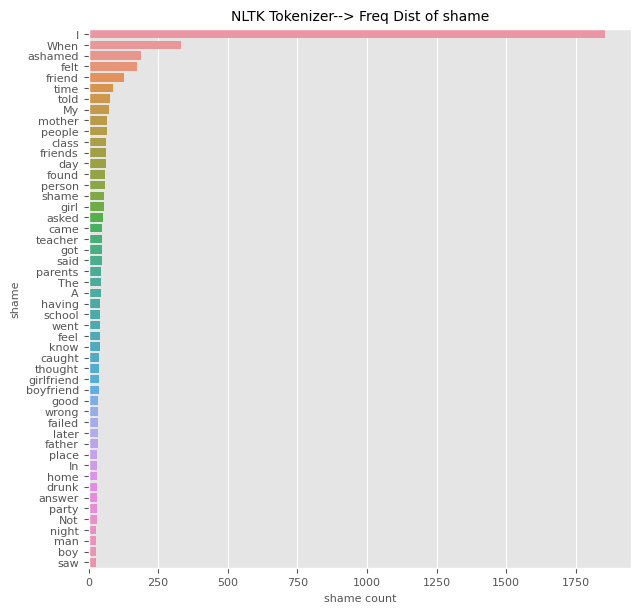

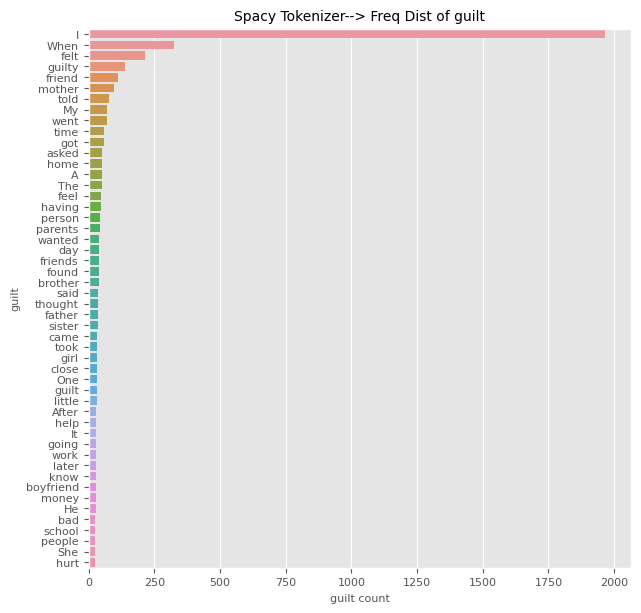

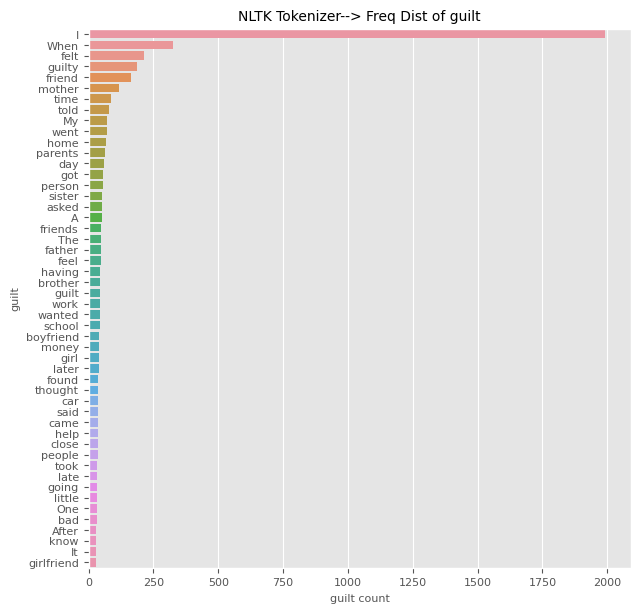

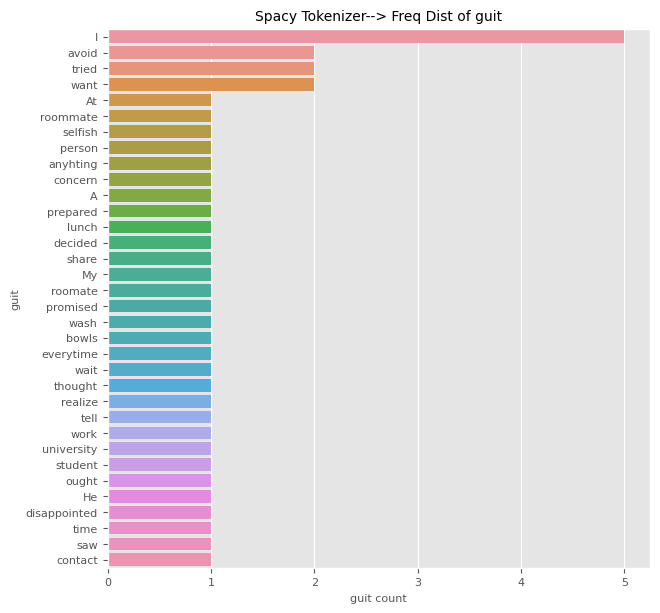

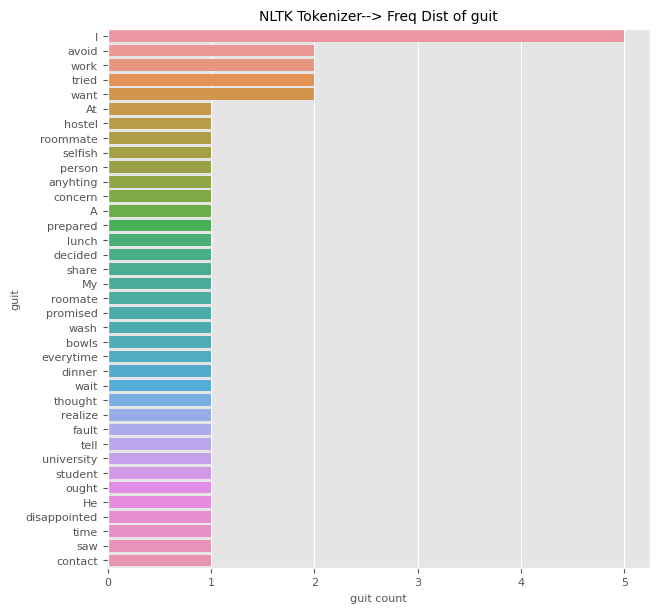

In [16]:
# Find Unique Emotions
unique_emotions = df['emotions'].unique()

# Group By Emotions
emotions_group_df = df.groupby('emotions', sort = False)

def remove_stopwords(token_list):
    corpus = []
    for token in token_list:
        if token not in (stopwords):
            corpus.append(token)
    return corpus

def remove_nonalpha(token_list):
    corpus = []
    for token in token_list:
        if str(token).isalpha():
            corpus.append(token)
    return corpus 
    
def find_max_min_avg(df):
    length_of_texts = df.str.split("\\s+")
    MAX_LEN = length_of_texts.str.len().max()
    MIN_LEN = length_of_texts.str.len().min()
    AVG_LEN = round(length_of_texts.str.len().mean(), 2)
    return MAX_LEN, MIN_LEN, AVG_LEN

def dist_and_plot(df, flag):
    if(flag):
        tkr = 'Spacy Tokenizer'
    else:
        tkr = 'NLTK Tokenizer'
        
    all_tokens = []
    for row in tqdm(df['texts']):
        if(flag):
            tokens = spacy_tokenizer(row)
            all_tokens.extend([i.text for i in tokens])
        else:
            tokens = nltk_tokenizer(row)
            all_tokens.extend([i for i in tokens])
    all_tokens = remove_stopwords(all_tokens)
    all_tokens = remove_nonalpha(all_tokens)
    count = Counter(all_tokens)
    print(tkr, '--> Vocab Size (', emotion, '):' , len(count))
    
    tokens_and_counts = count.most_common(50)
    tokens, counts = zip(*tokens_and_counts)
    vocab = {token: idx for idx, token in enumerate(tokens)}
    print(tkr, '--> Vocab (', emotion, '): \n' , vocab)
    
    token_list = [tup[0] for tup in tokens_and_counts]
    count_list = [tup[1] for tup in tokens_and_counts]
    filepath = 'Images/' + emotion + '_dist_part1.png'
    plot_dist(token_list, count_list, emotion + ' count', emotion, tkr + '--> Freq Dist of ' + emotion, filepath)
    

list_of_dict = []
for emotion in unique_emotions:
    emotion_dataF = emotions_group_df.get_group(emotion)
    max_min_avg = find_max_min_avg(emotion_dataF['texts'])
    temp_dict = {}
    temp_dict['Emotion Name'] = emotion
    temp_dict['Max-Length'] = max_min_avg[0]
    temp_dict['Min-Length'] = max_min_avg[1]
    temp_dict['Avg-Length'] = max_min_avg[2]
    list_of_dict.append(temp_dict)
    
    dist_and_plot(emotion_dataF, True) # SpaCy
    dist_and_plot(emotion_dataF, False) # NLTK

In [17]:
# Converting Dictionary to CSV
emotions_df = pd.DataFrame.from_dict(list_of_dict)
emotions_df.to_csv('emotions_df.csv',
                   index = False, 
                   sep = '\t')
print('\n Tab Delimited CSV: \n', emotions_df)


 Tab Delimited CSV: 
   Emotion Name  Max-Length  Min-Length  Avg-Length
0          joy         122           1       19.60
1         fear         119           2       23.95
2        anger         101           2       24.57
3      sadness         102           2       19.81
4      disgust         178           1       21.27
5        shame         169           1       22.36
6        guilt         159           1       23.94
7         guit         110         110      110.00
